In [1]:
import anndata
import scanpy as sc
import pandas as pd
import os
import hisepy

In [2]:
def read_adata_uuid(h5ad_uuid):
    h5ad_path = '/home/jupyter/cache/{u}'.format(u = h5ad_uuid)
    if not os.path.isdir(h5ad_path):
        hise_res = hisepy.reader.cache_files([h5ad_uuid])
    h5ad_filename = os.listdir(h5ad_path)[0]
    h5ad_file = '{p}/{f}'.format(p = h5ad_path, f = h5ad_filename)
    adata = sc.read_h5ad(h5ad_file)
    return adata

In [3]:
def read_obs_uuid(h5ad_uuid):
    h5ad_path = '/home/jupyter/cache/{u}'.format(u = h5ad_uuid)
    if not os.path.isdir(h5ad_path):
        hise_res = hisepy.reader.cache_files([h5ad_uuid])
    h5ad_filename = os.listdir(h5ad_path)[0]
    h5ad_file = '{p}/{f}'.format(p = h5ad_path, f = h5ad_filename)
    adata = sc.read_h5ad(h5ad_file, backed = 'r').obs.copy()
    return adata

In [4]:
def read_parquet_uuid(parquet_uuid):
    pq_path = '/home/jupyter/cache/{u}'.format(u = parquet_uuid)
    if not os.path.isdir(pq_path):
        hise_res = hisepy.reader.cache_files([parquet_uuid])
    pq_filename = os.listdir(pq_path)[0]
    pq_file = '{p}/{f}'.format(p = pq_path, f = pq_filename)
    df = pd.read_parquet(pq_file)
    return df

In [5]:
anno_cols = ['AIFI_L1', 'AIFI_L2', 'AIFI_L3']

In [6]:
cell_class = 't-cell'

## Read new subclustering results from HISE

In [7]:
new_h5ad_uuid = 'd6ebc576-34ea-4394-a569-e35e16f20253'
new_adata = read_adata_uuid(new_h5ad_uuid)

In [8]:
new_pq_uuid = '5651117a-0696-4590-8866-ac863f48dbda'
new_anno = read_parquet_uuid(new_pq_uuid)

In [9]:
new_obs = new_adata.obs.copy()
new_obs = new_obs.reset_index(drop = True)
new_obs = new_obs.merge(new_anno, on = 'barcodes', how = 'left')
new_obs['AIFI_L1'] = new_obs['AIFI_L1'].astype('category')
new_obs['AIFI_L2'] = new_obs['AIFI_L2'].astype('category')
new_obs['AIFI_L3'] = new_obs['AIFI_L3'].astype('category')
new_obs = new_obs.set_index('barcodes', drop = False)

In [10]:
new_obs['AIFI_L1'].value_counts()

AIFI_L1
T cell           1173521
Contamination      12170
NK cell             5514
Doublets             122
Name: count, dtype: int64

In [11]:
sum(new_obs['AIFI_L1'].isna())

0

In [12]:
new_anno.obs = new_obs

/tmp/ipykernel_18207/108851738.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  new_anno.obs = new_obs


In [13]:
new_anno.obs.columns

Index(['barcodes', 'batch_id', 'cell_name', 'cell_uuid', 'chip_id',
       'hto_barcode', 'hto_category', 'n_genes', 'n_mito_umis', 'n_reads',
       'n_umis', 'original_barcodes', 'pbmc_sample_id', 'pool_id', 'well_id',
       'sample.sampleKitGuid', 'cohort.cohortGuid', 'subject.subjectGuid',
       'subject.biologicalSex', 'subject.race', 'subject.ethnicity',
       'subject.birthYear', 'sample.visitName', 'sample.drawDate', 'file.id',
       'subject.cmv', 'subject.bmi', 'celltypist.low', 'seurat.l1',
       'seurat.l1.score', 'seurat.l2', 'seurat.l2.score', 'seurat.l2.5',
       'seurat.l2.5.score', 'seurat.l3', 'seurat.l3.score',
       'predicted_doublet', 'doublet_score', 'n_genes_by_counts',
       'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts',
       'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes',
       'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes',
       'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito',
       

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


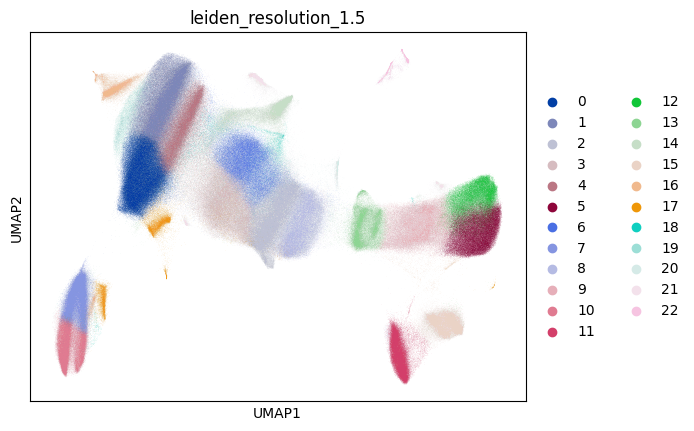

In [14]:
sc.pl.umap(
    new_adata,
    color = 'leiden_resolution_1.5'
)

In [15]:
temp_adata = anndata.AnnData(
    X = new_adata.X,
    obs = new_obs
)

In [16]:
new_adata.obs = temp_adata.obs

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting

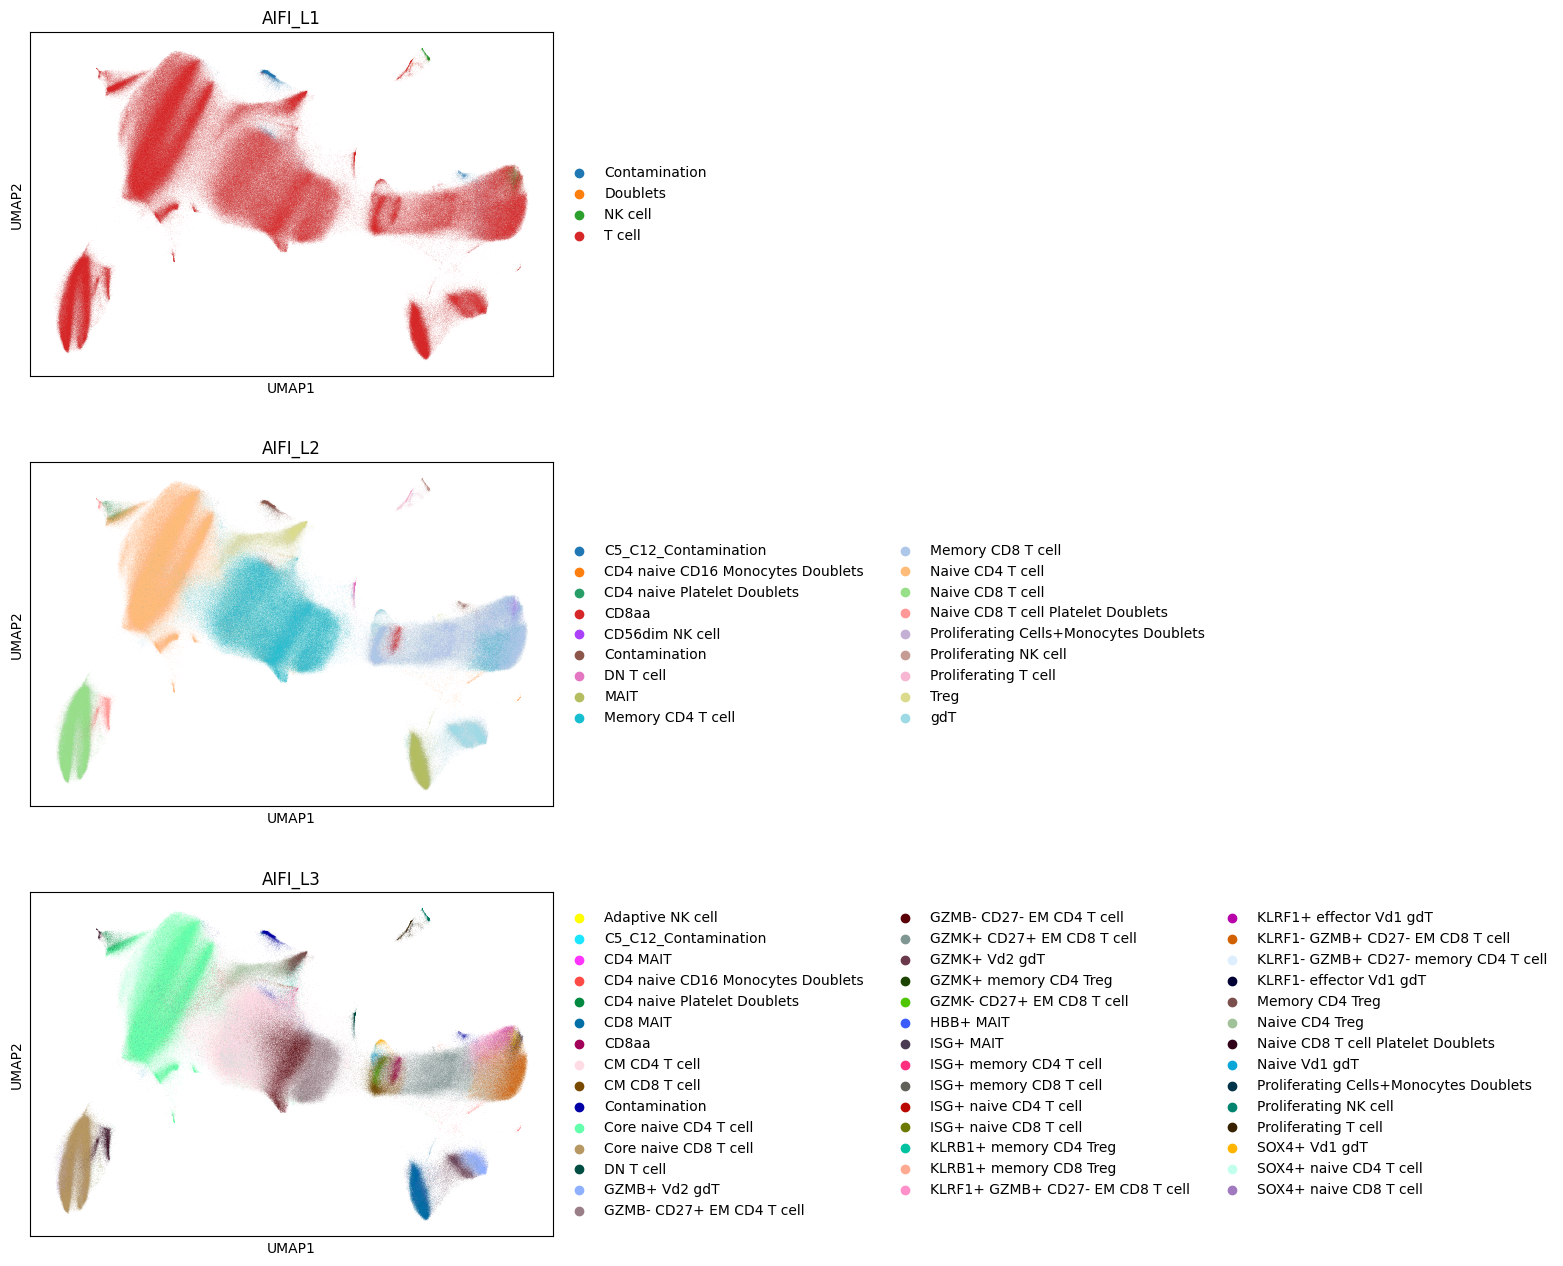

In [17]:
sc.pl.umap(
    new_adata,
    color = ['AIFI_L1', 'AIFI_L2', 'AIFI_L3'],
    ncols = 1
)

In [18]:
new_labels = new_adata.obs[['barcodes'] + anno_cols].copy()
for col in anno_cols:
    new_labels = new_labels.rename({col: 'new_' + col}, axis = 1)
new_labels = new_labels.reset_index(drop = True)

## Read old subclustering results from HISE

In [19]:
old_h5ad_uuid = '705ed42e-ec3d-4edb-a274-3bfd17fc6ffa'
old_adata = read_adata_uuid(old_h5ad_uuid)

/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [20]:
og_obs_list = []
for i in range(1, 11):
    og_file = 'Annotation_Part_{i}.parquet'.format(i = i)
    og_obs = pd.read_parquet(og_file)
    og_obs = og_obs[['barcodes', 'AIFI_L1', 'AIFI_L2', 'AIFI_L3']]
    og_obs_list.append(og_obs)

In [21]:
old_anno = pd.concat(og_obs_list)

In [22]:
old_anno.shape

(1193859, 4)

In [23]:
old_anno = old_anno.reset_index(drop = True)

In [24]:
old_obs = old_adata.obs.copy()
old_obs = old_obs.reset_index(drop = True)
old_obs = old_obs.merge(old_anno, on = 'barcodes', how = 'left')
old_obs = old_obs.set_index('barcodes', drop = False)

In [25]:
old_adata.obs = old_obs

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


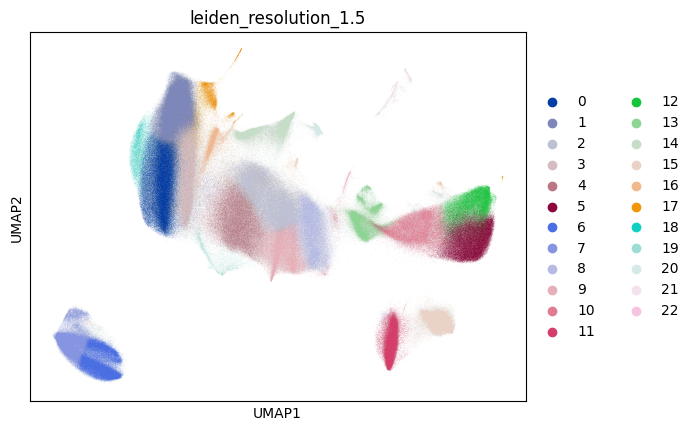

In [26]:
sc.pl.umap(
    old_adata,
    color = ['leiden_resolution_1.5'],
    ncols = 1
)

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting

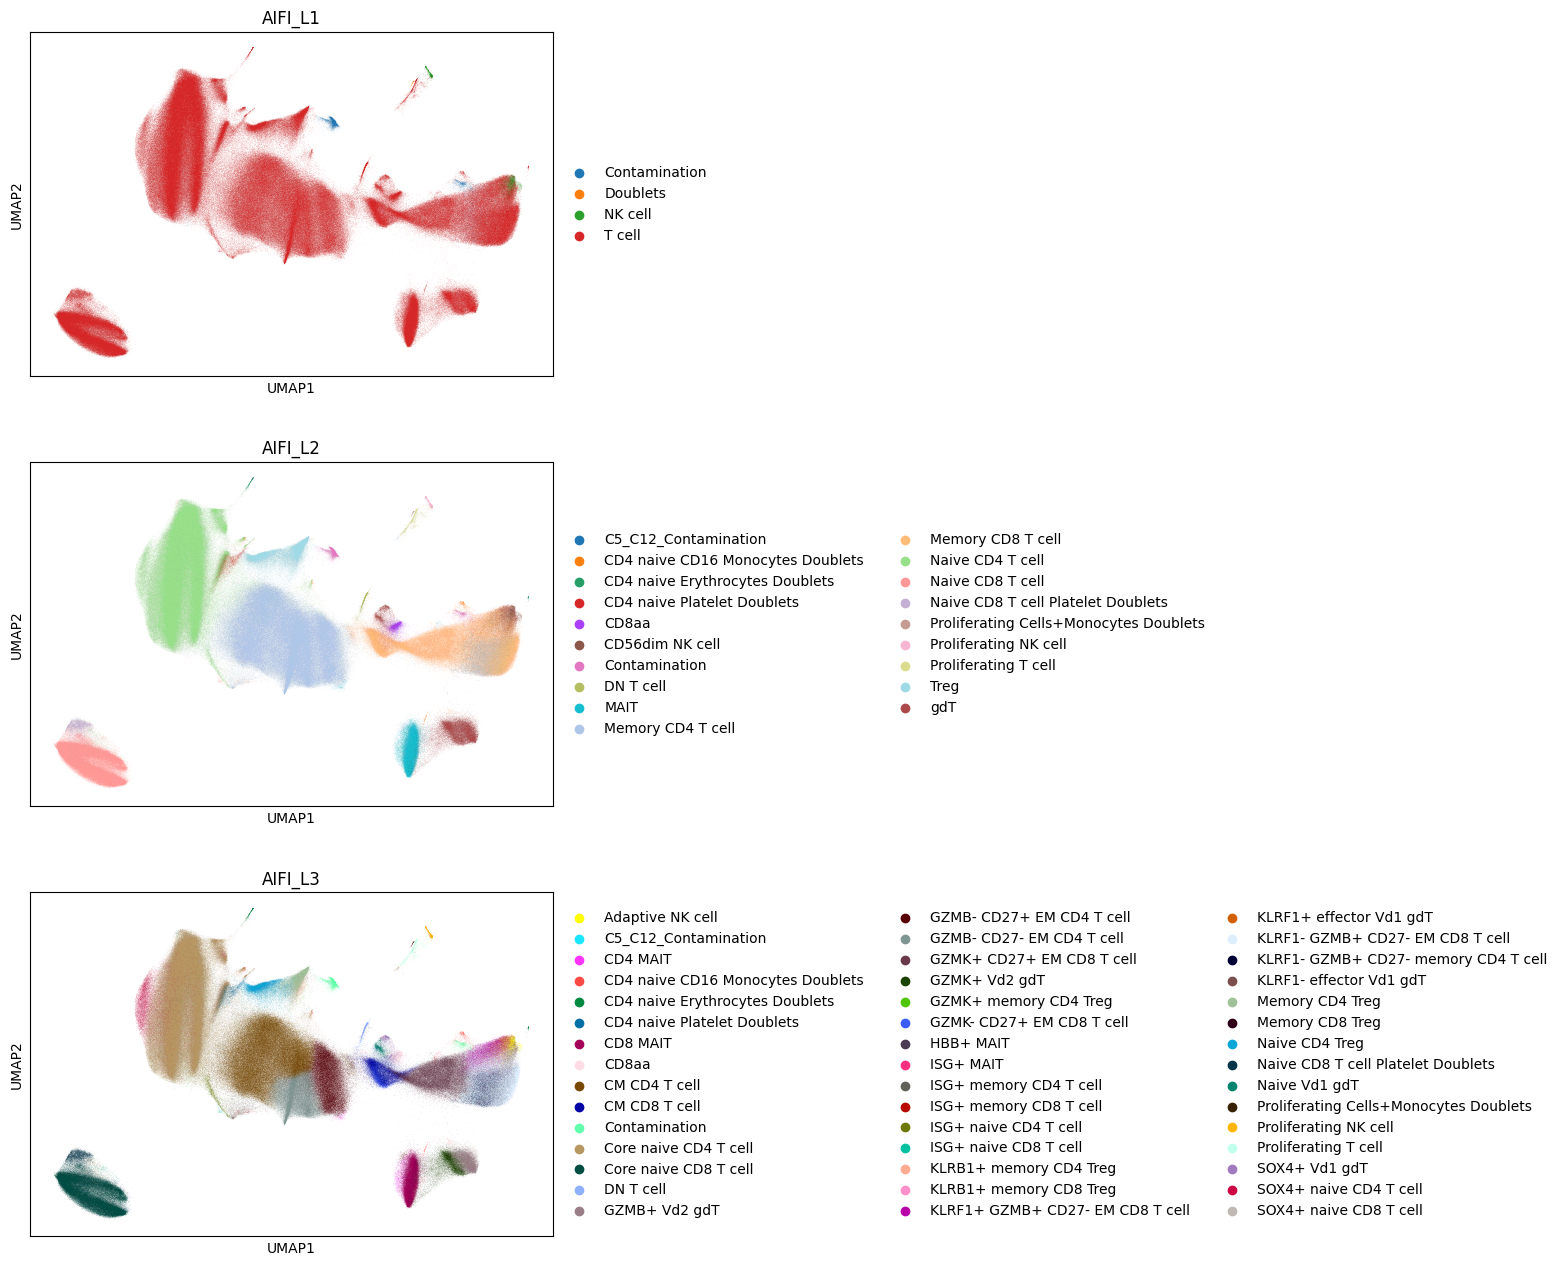

In [27]:
sc.pl.umap(
    old_adata,
    color = ['AIFI_L1', 'AIFI_L2', 'AIFI_L3'],
    ncols = 1
)

In [28]:
old_labels = old_adata.obs[['barcodes'] + anno_cols].copy()
for col in anno_cols:
    old_labels = old_labels.rename({col: 'old_' + col}, axis = 1)
old_labels = old_labels.reset_index(drop = True)

# Comparisons

In [29]:
comp = new_labels.merge(old_labels, on = 'barcodes', how = 'outer')

## L1 Comparison

In [30]:
level = 'L1'
new_col = 'new_AIFI_' + level
old_col = 'old_AIFI_' + level

In [31]:
comp[old_col] = comp[old_col].cat.add_categories(['Missing'])
comp[old_col] = comp[old_col].fillna('Missing')
old_cat = comp[old_col].cat.categories
comp[new_col] = comp[new_col].cat.set_categories(old_cat)
comp[new_col] = comp[new_col].fillna('Missing')

How many barcodes were in this category in either of the two runs?

In [32]:
n_total = comp.shape[0]
n_total

1194442

How many had identical assignments?

In [33]:
n_ident = sum(comp[old_col] == comp[new_col])
n_ident

1185273

What fraction is that?

In [34]:
frac_ident = n_ident / n_total
frac_ident

0.9923236121971598

What are the counts for each category in old and new annotations?

In [35]:
comp[old_col].value_counts()

old_AIFI_L1
T cell           1175350
Contamination      10799
NK cell             7515
Missing              583
Doublets             195
Name: count, dtype: int64

In [36]:
comp[new_col].value_counts()

new_AIFI_L1
T cell           1173521
Contamination      12170
NK cell             5514
Missing             3115
Doublets             122
Name: count, dtype: int64

What percentage of old labels changed?

In [37]:
(comp[new_col].value_counts() - comp[old_col].value_counts()) / comp[old_col].value_counts() * 100

new_AIFI_L1
T cell            -0.155613
Contamination     12.695620
NK cell          -26.626747
Missing          434.305317
Doublets         -37.435897
Name: count, dtype: float64

Where there are mismatches, what were old labels changed to?

In [38]:
diff = comp[comp[old_col] != comp[new_col]]

In [39]:
diff[[old_col, new_col]].value_counts().head(20)

old_AIFI_L1    new_AIFI_L1  
T cell         Contamination    2874
NK cell        Missing          1614
Contamination  T cell           1333
T cell         Missing          1180
NK cell        T cell            808
Missing        T cell            479
T cell         NK cell           393
Contamination  Missing           245
Doublets       Missing            76
Missing        NK cell            73
NK cell        Contamination      49
Missing        Contamination      30
T cell         Doublets            5
Contamination  NK cell             4
Doublets       T cell              3
NK cell        Doublets            1
Doublets       NK cell             1
Missing        Doublets            1
Name: count, dtype: int64

Generate a plot on old coordinates showing where things differ

In [40]:
match_bc = comp['barcodes'][comp[old_col] == comp[new_col]].to_list()
match_lgl = old_adata.obs['barcodes'].isin(match_bc)
match_values = []
for lgl in match_lgl:
    if lgl:
        match_values.append('Match')
    else:
        match_values.append('Mismatch')

In [41]:
old_adata.obs['match'] = match_values
old_adata.obs['match'] = old_adata.obs['match'].astype('category')

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting

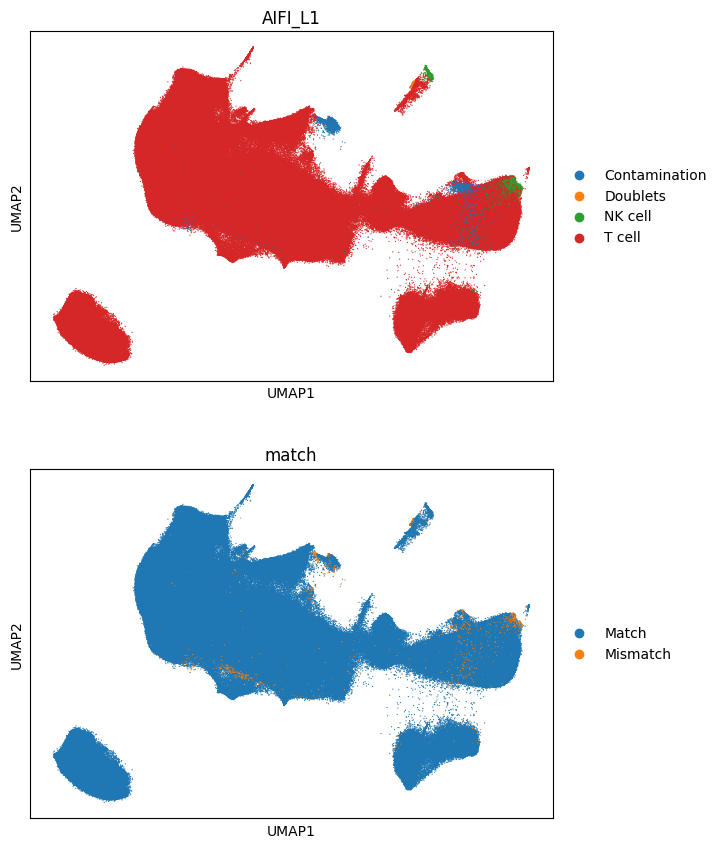

In [42]:
sc.pl.umap(
    old_adata,
    color = ['AIFI_L1', 'match'],
    ncols = 1,
    size = 3
)

Generate a plot on new coordinates showing where things differ

In [43]:
match_bc = comp['barcodes'][comp[old_col] == comp[new_col]].to_list()
match_lgl = new_adata.obs['barcodes'].isin(match_bc)
match_values = []
for lgl in match_lgl:
    if lgl:
        match_values.append('Match')
    else:
        match_values.append('Mismatch')

In [44]:
new_adata.obs['match'] = match_values
new_adata.obs['match'] = new_adata.obs['match'].astype('category')

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting

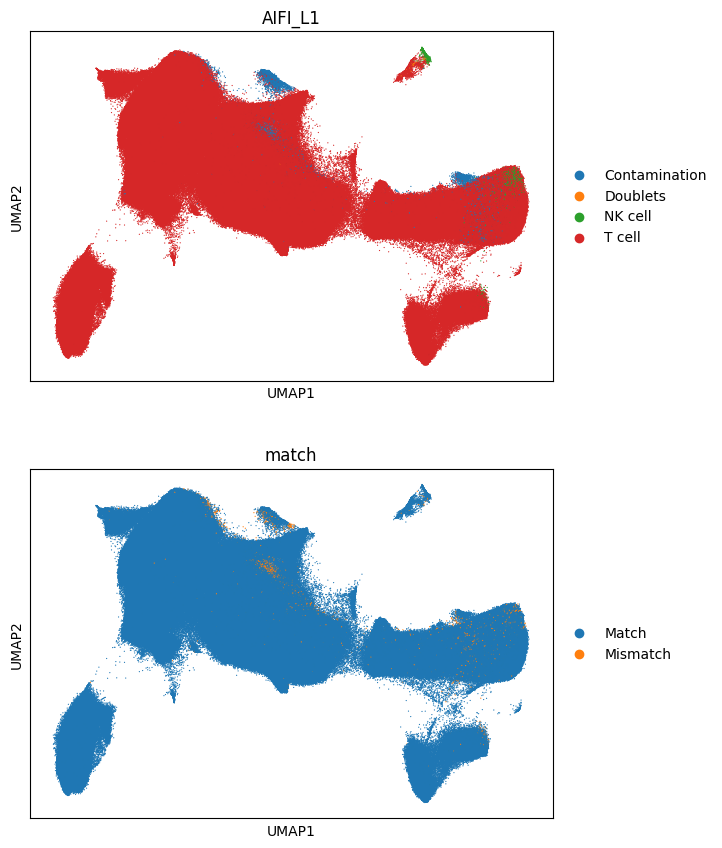

In [45]:
sc.pl.umap(
    new_adata,
    color = ['AIFI_L1', 'match'],
    ncols = 1,
    size = 3
)

## L2 Comparison

In [46]:
level = 'L2'
new_col = 'new_AIFI_' + level
old_col = 'old_AIFI_' + level

In [47]:
comp = new_labels.merge(old_labels, on = 'barcodes', how = 'outer')

In [48]:
comp[old_col] = comp[old_col].cat.add_categories(['Missing'])
comp[old_col] = comp[old_col].fillna('Missing')
old_cat = comp[old_col].cat.categories
comp[new_col] = comp[new_col].cat.set_categories(old_cat)
comp[new_col] = comp[new_col].fillna('Missing')

How many barcodes were in this category in either of the two runs?

In [49]:
n_total = comp.shape[0]
n_total

1194442

How many had identical assignments?

In [50]:
n_ident = sum(comp[old_col] == comp[new_col])
n_ident

1140376

What fraction is that?

In [51]:
frac_ident = n_ident / n_total
frac_ident

0.9547353492258309

What are the counts for each category in old and new annotations?

In [52]:
comp[old_col].value_counts()

old_AIFI_L2
Naive CD4 T cell                          382333
Memory CD4 T cell                         320150
Memory CD8 T cell                         182439
Naive CD8 T cell                          124623
gdT                                        51009
MAIT                                       48095
Treg                                       40051
Contamination                               8564
Naive CD8 T cell Platelet Doublets          7293
CD56dim NK cell                             5671
CD8aa                                       5591
CD4 naive Platelet Doublets                 4706
CD4 naive CD16 Monocytes Doublets           3522
Proliferating T cell                        2436
C5_C12_Contamination                        2235
DN T cell                                   2226
Proliferating NK cell                       1844
CD4 naive Erythrocytes Doublets              876
Missing                                      583
Proliferating Cells+Monocytes Doublets       195
Name: co

In [53]:
comp[new_col].value_counts()

new_AIFI_L2
Naive CD4 T cell                          378071
Memory CD4 T cell                         321788
Memory CD8 T cell                         183096
Naive CD8 T cell                          121167
gdT                                        50544
MAIT                                       48027
Treg                                       39087
Naive CD8 T cell Platelet Doublets         14199
Contamination                              10233
CD4 naive Platelet Doublets                 5769
CD8aa                                       5737
CD56dim NK cell                             3626
Missing                                     3115
DN T cell                                   2349
Proliferating T cell                        2320
C5_C12_Contamination                        1937
Proliferating NK cell                       1888
CD4 naive CD16 Monocytes Doublets           1367
Proliferating Cells+Monocytes Doublets       122
CD4 naive Erythrocytes Doublets                0
Name: co

What percentage of old labels changed?

In [54]:
(comp[new_col].value_counts() - comp[old_col].value_counts()) / comp[old_col].value_counts() * 100

C5_C12_Contamination                      -13.333333
CD4 naive CD16 Monocytes Doublets         -61.186826
CD4 naive Erythrocytes Doublets          -100.000000
CD4 naive Platelet Doublets                22.588185
CD8aa                                       2.611340
CD56dim NK cell                           -36.060659
Contamination                              19.488557
DN T cell                                   5.525606
MAIT                                       -0.141387
Memory CD4 T cell                           0.511635
Memory CD8 T cell                           0.360120
Naive CD4 T cell                           -1.114735
Naive CD8 T cell                           -2.773164
Naive CD8 T cell Platelet Doublets         94.693542
Proliferating Cells+Monocytes Doublets    -37.435897
Proliferating NK cell                       2.386117
Proliferating T cell                       -4.761905
Treg                                       -2.406931
gdT                                        -0.

Where there are mismatches, what were old labels changed to?

In [55]:
diff = comp[comp[old_col] != comp[new_col]]

In [56]:
diff[[old_col, new_col]].value_counts().head(20)

old_AIFI_L2                         new_AIFI_L2                       
Naive CD4 T cell                    Memory CD4 T cell                     6691
Memory CD4 T cell                   Naive CD4 T cell                      5012
Naive CD8 T cell                    Naive CD8 T cell Platelet Doublets    4405
Memory CD8 T cell                   Memory CD4 T cell                     3659
Memory CD4 T cell                   Memory CD8 T cell                     3435
Naive CD4 T cell                    Naive CD8 T cell Platelet Doublets    3430
Memory CD4 T cell                   Contamination                         2138
Naive CD4 T cell                    CD4 naive Platelet Doublets           2020
CD4 naive CD16 Monocytes Doublets   Naive CD4 T cell                      1714
CD56dim NK cell                     Missing                               1605
Treg                                Memory CD4 T cell                     1548
gdT                                 Memory CD8 T cell       

In [57]:
match_bc = comp['barcodes'][comp[old_col] == comp[new_col]].to_list()
match_lgl = old_adata.obs['barcodes'].isin(match_bc)
match_values = []
for lgl in match_lgl:
    if lgl:
        match_values.append('Match')
    else:
        match_values.append('Mismatch')

In [58]:
old_adata.obs['match'] = match_values
old_adata.obs['match'] = old_adata.obs['match'].astype('category')

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting

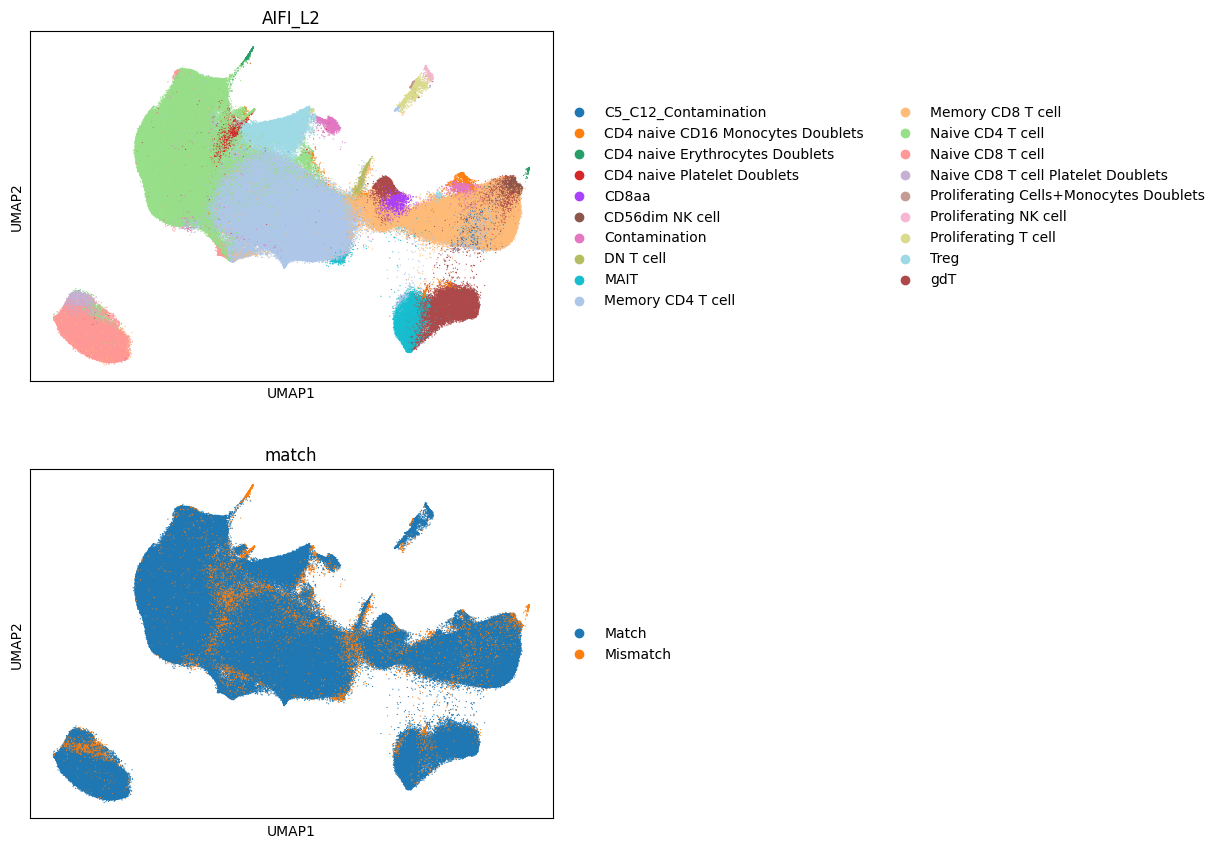

In [59]:
sc.pl.umap(
    old_adata,
    color = ['AIFI_L2', 'match'],
    ncols = 1,
    size = 3
)

Generate a plot on new coordinates showing where things differ

In [60]:
match_bc = comp['barcodes'][comp[old_col] == comp[new_col]].to_list()
match_lgl = new_adata.obs['barcodes'].isin(match_bc)
match_values = []
for lgl in match_lgl:
    if lgl:
        match_values.append('Match')
    else:
        match_values.append('Mismatch')

In [61]:
new_adata.obs['match'] = match_values
new_adata.obs['match'] = new_adata.obs['match'].astype('category')

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting

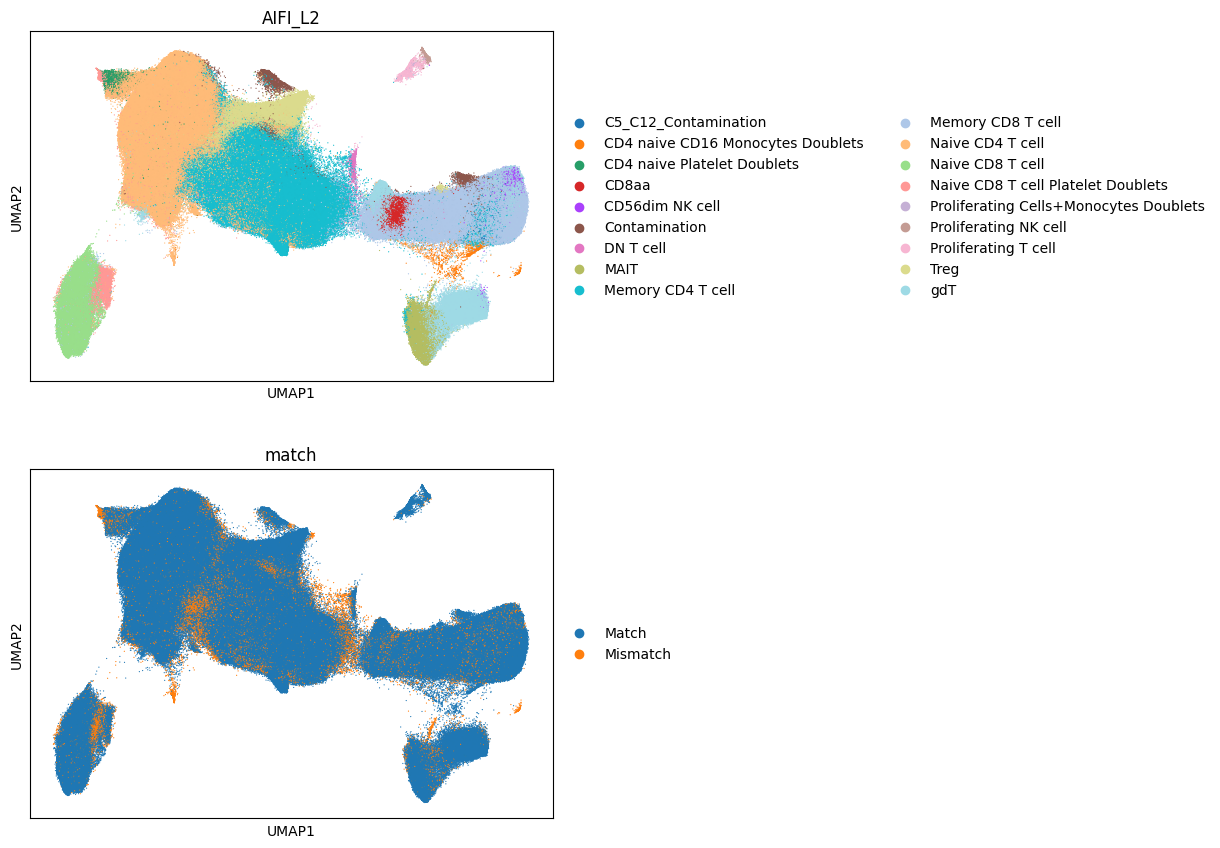

In [62]:
sc.pl.umap(
    new_adata,
    color = ['AIFI_L2', 'match'],
    ncols = 1,
    size = 3
)

## L3 Comparison

In [63]:
level = 'L3'
new_col = 'new_AIFI_' + level
old_col = 'old_AIFI_' + level

In [64]:
comp = new_labels.merge(old_labels, on = 'barcodes', how = 'outer')

In [65]:
comp[old_col] = comp[old_col].cat.add_categories(['Missing'])
comp[old_col] = comp[old_col].fillna('Missing')
old_cat = comp[old_col].cat.categories
comp[new_col] = comp[new_col].cat.set_categories(old_cat)
comp[new_col] = comp[new_col].fillna('Missing')

How many barcodes were in this category in either of the two runs?

In [66]:
n_total = comp.shape[0]
n_total

1194442

How many had identical assignments?

In [67]:
n_ident = sum(comp[old_col] == comp[new_col])
n_ident

1047724

What fraction is that?

In [68]:
frac_ident = n_ident / n_total
frac_ident

0.8771660742003379

What are the counts for each category in old and new annotations?

In [69]:
comp[old_col].value_counts()

old_AIFI_L3
Core naive CD4 T cell                     352699
CM CD4 T cell                             173578
Core naive CD8 T cell                     117237
KLRF1- GZMB+ CD27- EM CD8 T cell           70293
GZMB- CD27+ EM CD4 T cell                  62544
GZMB- CD27- EM CD4 T cell                  62119
GZMK+ CD27+ EM CD8 T cell                  60917
CD8 MAIT                                   41850
CM CD8 T cell                              25405
SOX4+ naive CD4 T cell                     22485
Naive CD4 Treg                             19578
KLRF1+ GZMB+ CD27- EM CD8 T cell           18310
GZMB+ Vd2 gdT                              18294
GZMK+ Vd2 gdT                              17826
KLRF1- GZMB+ CD27- memory CD4 T cell       17574
Memory CD4 Treg                            15661
Contamination                               8564
Naive CD8 T cell Platelet Doublets          7293
ISG+ naive CD4 T cell                       7149
GZMK- CD27+ EM CD8 T cell                   6703
SOX4+ na

In [70]:
comp[new_col].value_counts()

new_AIFI_L3
Core naive CD4 T cell                     341521
CM CD4 T cell                             161769
Core naive CD8 T cell                     115126
GZMB- CD27+ EM CD4 T cell                  70587
GZMB- CD27- EM CD4 T cell                  67332
KLRF1- GZMB+ CD27- EM CD8 T cell           65156
GZMK+ CD27+ EM CD8 T cell                  62099
CD8 MAIT                                   44119
SOX4+ naive CD4 T cell                     29411
CM CD8 T cell                              28453
Naive CD4 Treg                             21919
KLRF1+ GZMB+ CD27- EM CD8 T cell           21471
GZMK+ Vd2 gdT                              18382
GZMB+ Vd2 gdT                              17371
KLRF1- GZMB+ CD27- memory CD4 T cell       17162
Naive CD8 T cell Platelet Doublets         14199
Memory CD4 Treg                            13368
Contamination                              10233
ISG+ naive CD4 T cell                       7139
CD4 naive Platelet Doublets                 5769
CD8aa   

What percentage of old labels changed?

In [71]:
(comp[new_col].value_counts() - comp[old_col].value_counts()) / comp[old_col].value_counts() * 100

Adaptive NK cell                          -36.060659
C5_C12_Contamination                      -13.333333
CD4 MAIT                                  -63.582369
CD4 naive CD16 Monocytes Doublets         -61.186826
CD4 naive Erythrocytes Doublets          -100.000000
CD4 naive Platelet Doublets                22.588185
CD8 MAIT                                    5.421744
CD8aa                                       2.611340
CM CD4 T cell                              -6.803282
CM CD8 T cell                              11.997638
Contamination                              19.488557
Core naive CD4 T cell                      -3.169275
Core naive CD8 T cell                      -1.800626
DN T cell                                   5.525606
GZMB+ Vd2 gdT                              -5.045370
GZMB- CD27+ EM CD4 T cell                  12.859747
GZMB- CD27- EM CD4 T cell                   8.391957
GZMK+ CD27+ EM CD8 T cell                   1.940345
GZMK+ Vd2 gdT                               3.

Where there are mismatches, what were old labels changed to?

In [72]:
diff = comp[comp[old_col] != comp[new_col]]

In [73]:
diff[[old_col, new_col]].value_counts().head(20)

old_AIFI_L3                       new_AIFI_L3                       
CM CD4 T cell                     GZMB- CD27- EM CD4 T cell             19418
GZMB- CD27- EM CD4 T cell         GZMB- CD27+ EM CD4 T cell              9688
Core naive CD4 T cell             SOX4+ naive CD4 T cell                 8905
GZMB- CD27- EM CD4 T cell         CM CD4 T cell                          7329
Core naive CD4 T cell             CM CD4 T cell                          5949
CM CD4 T cell                     GZMB- CD27+ EM CD4 T cell              5664
KLRF1- GZMB+ CD27- EM CD8 T cell  KLRF1+ GZMB+ CD27- EM CD8 T cell       5181
CM CD4 T cell                     Core naive CD4 T cell                  4158
Core naive CD8 T cell             Naive CD8 T cell Platelet Doublets     4006
GZMB- CD27+ EM CD4 T cell         CM CD4 T cell                          3737
Core naive CD4 T cell             Naive CD8 T cell Platelet Doublets     3401
GZMB- CD27+ EM CD4 T cell         GZMB- CD27- EM CD4 T cell              

In [74]:
match_bc = comp['barcodes'][comp[old_col] == comp[new_col]].to_list()
match_lgl = old_adata.obs['barcodes'].isin(match_bc)
match_values = []
for lgl in match_lgl:
    if lgl:
        match_values.append('Match')
    else:
        match_values.append('Mismatch')

In [75]:
old_adata.obs['match'] = match_values
old_adata.obs['match'] = old_adata.obs['match'].astype('category')

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting

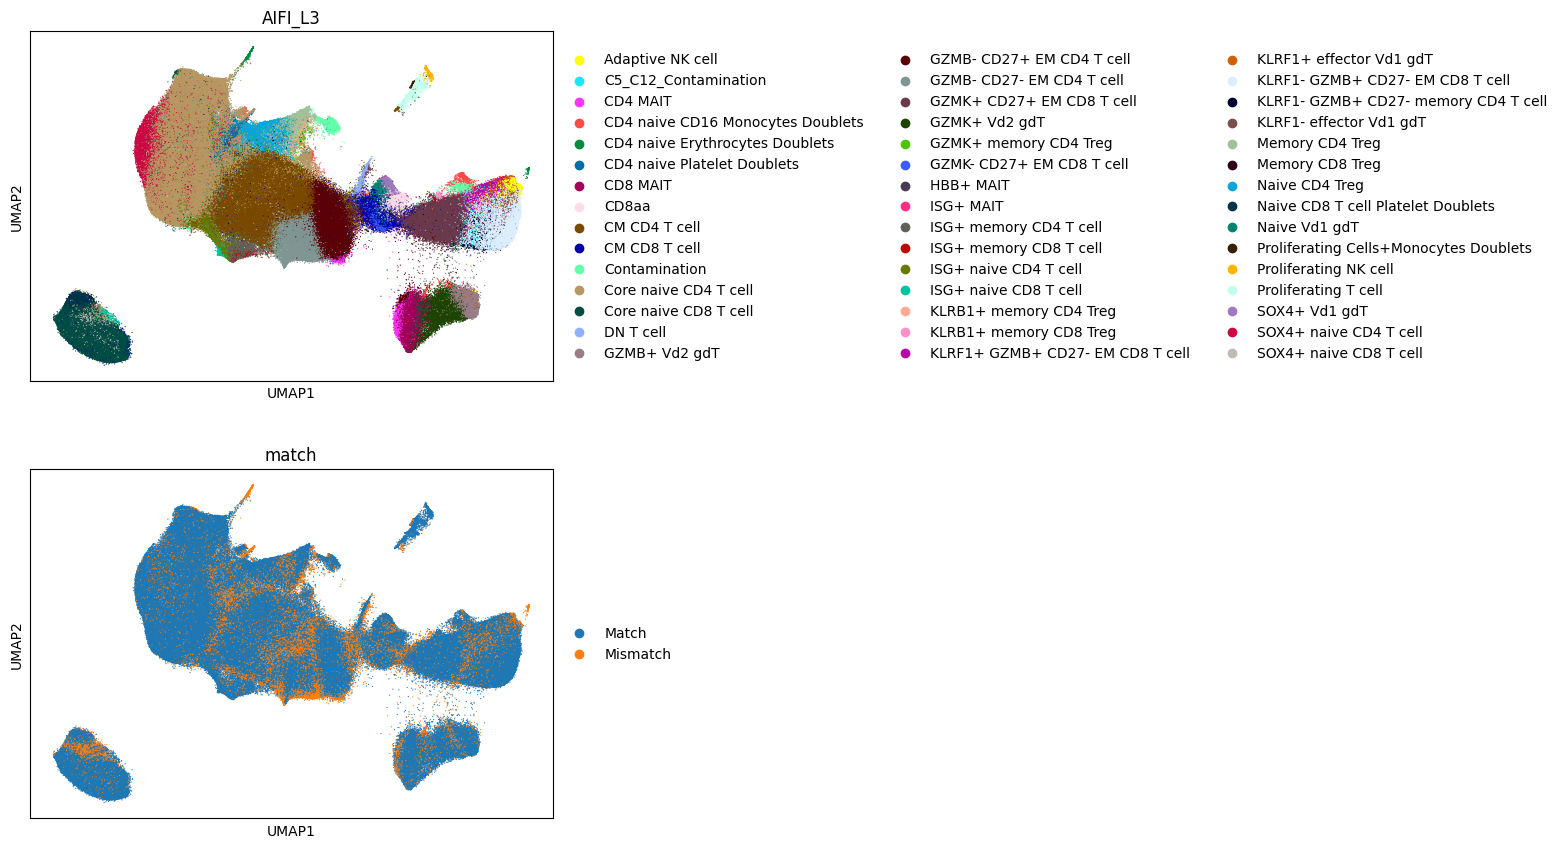

In [76]:
sc.pl.umap(
    old_adata,
    color = ['AIFI_L3', 'match'],
    ncols = 1,
    size = 3
)

Generate a plot on new coordinates showing where things differ

In [77]:
match_bc = comp['barcodes'][comp[old_col] == comp[new_col]].to_list()
match_lgl = new_adata.obs['barcodes'].isin(match_bc)
match_values = []
for lgl in match_lgl:
    if lgl:
        match_values.append('Match')
    else:
        match_values.append('Mismatch')

In [78]:
new_adata.obs['match'] = match_values
new_adata.obs['match'] = new_adata.obs['match'].astype('category')

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting

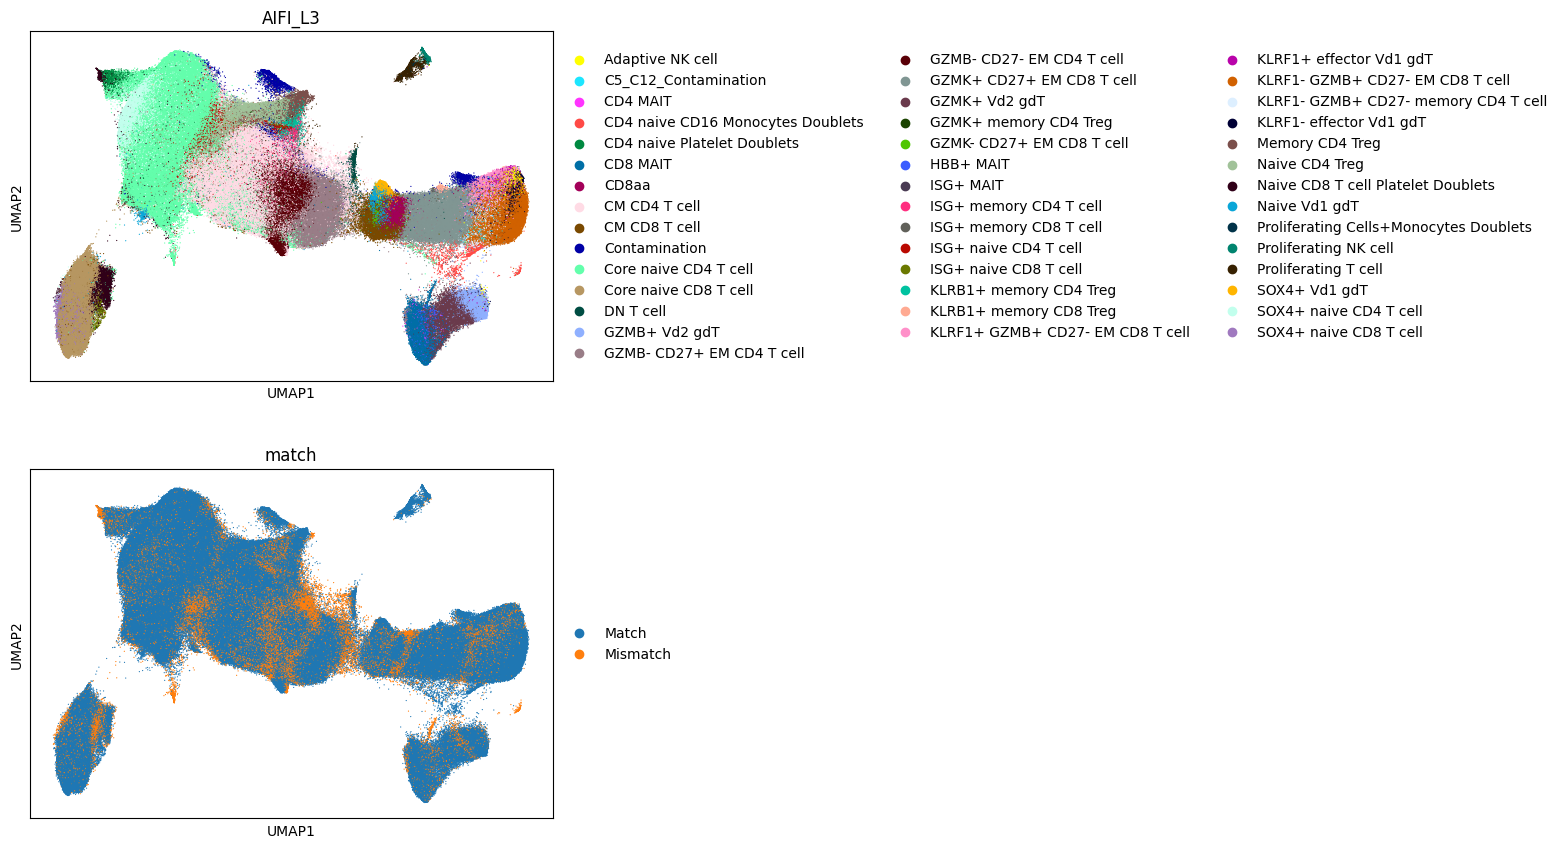

In [79]:
sc.pl.umap(
    new_adata,
    color = ['AIFI_L3', 'match'],
    ncols = 1,
    size = 3
)